In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

## Show the results from BO, include parameter, observation, and best Ronchigrams

In [5]:
path = '../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_standardize_removebuffer_scaleApt_beta4_120iter/'
nrep = 12
ndim = 7
abr_list = ["C10", "C12.x", "C12.y", "C21.x", "C21.y", "C23.x", "C23.y", "C30","C32.x", "C32.y", "C34.x", "C34.y"]
abr_lim = [2e-6, 1.5e-7, 1.5e-7, 3e-6, 3e-6, 1e-5, 1e-5, 3e-4, 2e-4, 2e-4, 1.5e-4, 1.5e-4]
act_list = [True, True, True, True, True, True, True, False, False, False, False, False]
abr_lim = [abr_lim[i] for i in range(len(abr_list)) if act_list[i]]
abr_list = [abr_list[i] for i in range(len(abr_list)) if act_list[i]]
idx_list = [0,1,2,3,4]
idx_list = [i for i in range(10)]
nrep = len(idx_list)

In [6]:
print(abr_list)
print(abr_lim)
print(nrep)

['C10', 'C12.x', 'C12.y', 'C21.x', 'C21.y', 'C23.x', 'C23.y']
[2e-06, 1.5e-07, 1.5e-07, 3e-06, 3e-06, 1e-05, 1e-05]
10


../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_standardize_removebuffer_scaleApt_beta4_120iter/Ronchigram_00.npy 120
0.9133550524711609
../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_standardize_removebuffer_scaleApt_beta4_120iter/Ronchigram_01.npy 120
0.889235183596611
../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_standardize_removebuffer_scaleApt_beta4_120iter/Ronchigram_02.npy 120
0.8974634110927582
../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_standardize_removebuffer_scaleApt_beta4_120iter/Ronchigram_03.npy 120
0.9150245636701584
../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_standardize_removebuffer_scaleApt_beta4_120iter/Ronchigram_04.npy 120
0.9135023579001427
../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_standardize_removebuffer_scaleApt_beta4_120iter/Ronchigram_05.npy 120
0.9040258079767227
../../../NionData/110921/2ndorder_1storder_attempt00_45mrad_250ms_stand

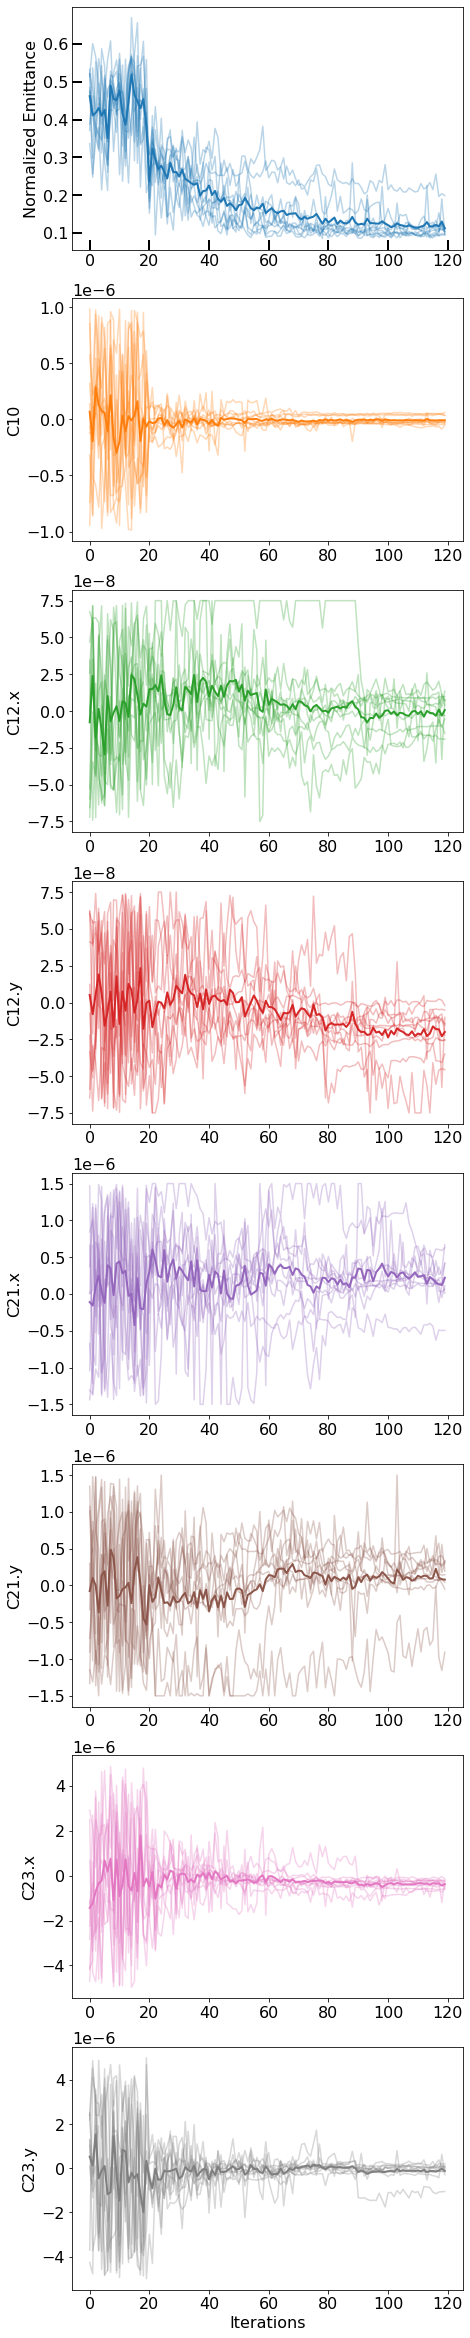

In [7]:
X = np.load(path + 'X_' + "{:02d}".format(0) + '.npy')
ndim = X.shape[1]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

final_Y = 0

# Make the overall plot
fig, ax = plt.subplots(ncols = 1, nrows = ndim + 1, figsize = [7,ndim * 6])
ronch_init = np.zeros([128 * nrep, 128])
ronch_final = np.zeros([128 * nrep, 128])
average_list = [[0 for _ in range(X.shape[0])] for _ in range(ndim + 1)]

for irep in range(nrep):
    idx = idx_list[irep]
    Y = np.squeeze(np.load(path + 'Y_' + "{:02d}".format(idx) + '.npy'))
    X = np.load(path + 'X_' + "{:02d}".format(idx) + '.npy')
    Ronch = np.load(path + 'Ronchigram_' + "{:02d}".format(idx) + '.npy')
    print(path + 'Ronchigram_' + "{:02d}".format(idx) + '.npy', len(X))
    ax[0].plot(1-Y, c='C0', alpha = 0.3)
    average_list[0] += 1-Y
    for i in range(ndim):
        color = 'C' + str(i+1)
        ax[i+1].plot((X[:,i] - 0.5) * abr_lim[i], c = color, alpha = 0.3)
        average_list[i + 1] += (X[:,i] - 0.5) * abr_lim[i]
    best_idx = np.argmax(Y)
    print(Y[best_idx])
    final_Y += np.max(Y)
    ronch_init[128 * irep : 128 * (irep + 1), :] = Ronch[0]
    ronch_final[128 * irep : 128 * (irep + 1), :] = Ronch[best_idx - 19]
#     ronch_final[128 * irep : 128 * (irep + 1), :] = Ronch[-2]

ax[0].tick_params(which='major',direction = 'in', length = 10, width = 2)
ax[0].tick_params(which='minor',direction = 'in', length = 5)
ax[0].set_ylabel('Normalized Emittance', fontsize = 16)
ax[0].plot(average_list[0] / nrep, c = 'C0', linewidth = 2)

for i in range(ndim):
    color = 'C' + str(i+1)
    ax[i+1].set_ylabel(abr_list[i])
    ax[i+1].plot(average_list[i+1] / nrep, c = color, linewidth = 2)
    
ax[i+1].set_xlabel('Iterations',fontsize = 16)
print('Average best seen: ' + str(final_Y / nrep))

0.8581445068120956
(101, 128, 128)


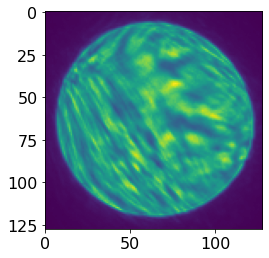

In [17]:
idx = 7
plt.imshow(Ronch[idx])
print(Y[idx + 19])
print(Ronch.shape)

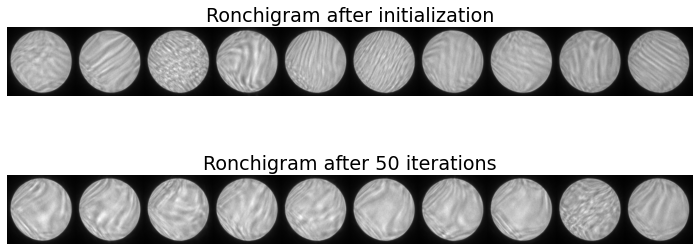

In [161]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [10,5])
ax[0].imshow(np.transpose(ronch_init), cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('Ronchigram after initialization')
ax[1].imshow(np.transpose(ronch_final), cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('Ronchigram after 50 iterations')
plt.tight_layout()

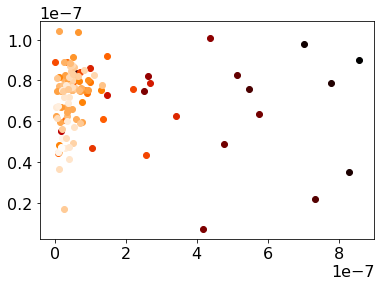

In [60]:
colors = cm.gist_heat((Y-np.amin(Y))/(np.amax(Y) - np.amin(Y)))
for y, c in zip(X, colors):
    plt.scatter(abs(y[0]-0.5)* abr_lim[0], np.sqrt((y[1]-0.5)**2 + (y[2]-0.5)**2) * abr_lim[1], color=c)
# plt.scatter(X[0], X[1], color = 1-Y)

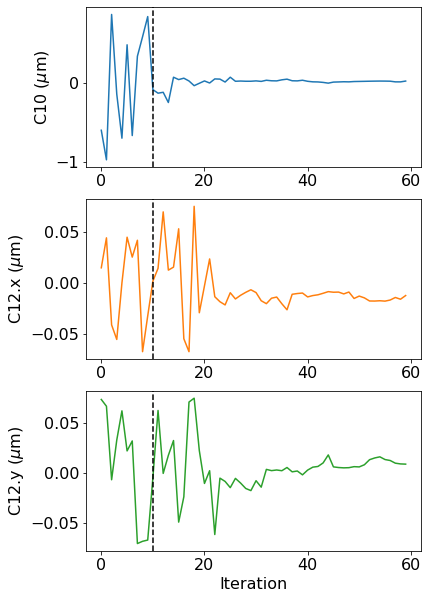

In [19]:
path = '../../NionData/110121/Defocus_attempt02_FristOrder_250ms_standardize_normalizeapt_removebuffer/'
fig, ax = plt.subplots(3, 1, figsize = [6, 10])
n = 1
for idx in range(n):
    Y = np.squeeze(np.load(path + 'FirstOrder_45mrad_250ms_standardize_removebuffer_' + str(idx) + '_Y.npy'))
    X = np.load(path + 'FirstOrder_45mrad_250ms_standardize_removebuffer_' + str(idx) + '_X.npy')
    Ronch = np.load(path + 'FirstOrder_45mrad_250ms_standardize_removebuffer_' + str(idx) + '_Ronchigram.npy')
    ax[0].plot((X[:,0] - 0.5) * 2, c = 'C0', alpha = 1.0)
    ax[1].plot((X[:,1] - 0.5) * 0.15, c = 'C1', alpha = 1.0)
    ax[2].plot((X[:,2] - 0.5) * 0.15, c = 'C2', alpha = 1.0)
    
ax[0].set_ylabel('C10 ($\mu$m)', fontsize = 16)
ax[1].set_ylabel('C12.x ($\mu$m)', fontsize = 16)
ax[2].set_ylabel('C12.y ($\mu$m)', fontsize = 16)
ax[2].set_xlabel('Iteration', fontsize = 16)
ax[0].tick_params(axis='both', labelsize=16)
ax[1].tick_params(axis='both', labelsize=16)
ax[2].tick_params(axis='both', labelsize=16)
ax[0].axvline(x=10, ls = '--', color = 'black')
ax[1].axvline(x=10, ls = '--', color = 'black')
ax[2].axvline(x=10, ls = '--', color = 'black')

In [35]:
X.shape

(40, 3)

In [26]:
# Y.shape
Y
# np.argmax(Y)

array([0.70983046, 0.5481717 , 0.39471924, 0.80165249, 0.47387743,
       0.40663439, 0.44702578, 0.91941296, 0.40723079, 0.93309847,
       0.81304535, 0.912251  , 0.9215325 , 0.86378115, 0.89840537,
       0.86887562, 0.88488872, 0.8656276 , 0.88030323, 0.92186593,
       0.92899273, 0.93074134, 0.89142099, 0.87301004, 0.91749658,
       0.92180276, 0.91828503, 0.92907137, 0.93002723, 0.92439531,
       0.91735163, 0.87494165, 0.89347447, 0.91725357, 0.92443313,
       0.91817123, 0.9295812 , 0.92830932, 0.91600132, 0.91922358])

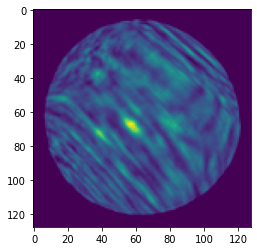

In [3]:
plt.imshow(Ronch[-12,:,:])